In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.datasets import mnist

In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL']='2'
%matplotlib inline

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Image (#4): Which is digit '9'


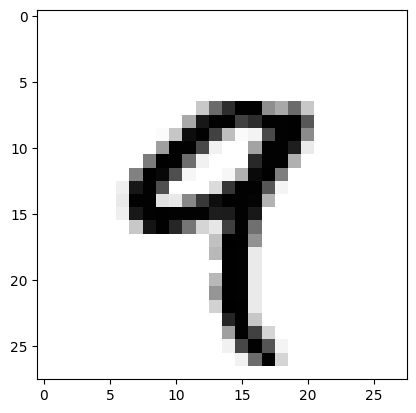

In [5]:
digit = 4
a = x_train[digit]
plt.imshow(a, cmap='gray_r')
print(f"Image (#{digit}): Which is digit '{y_train[digit]}'")


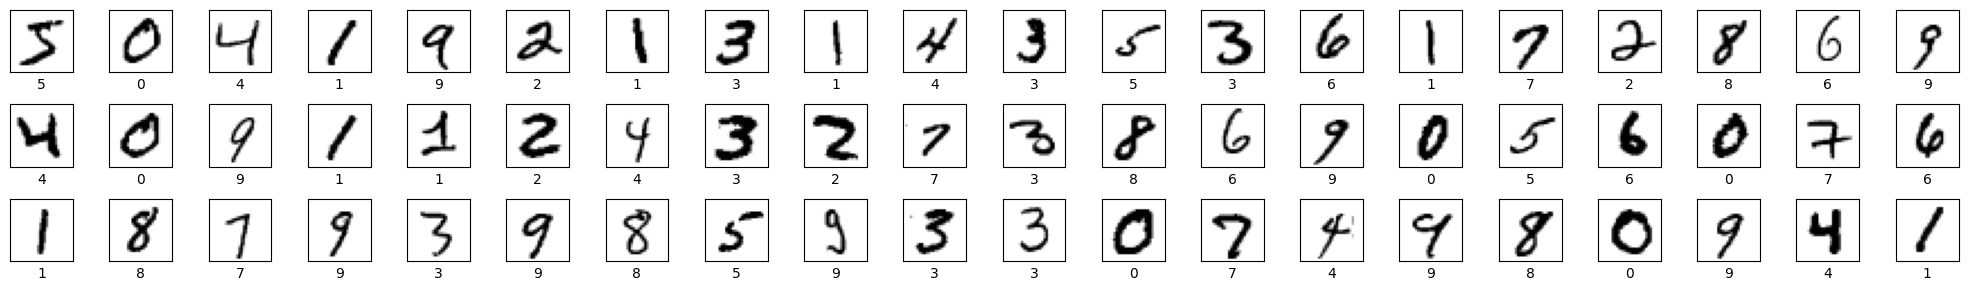

In [6]:
ROWS = 3
COLS = 20
i = 0

plt.figure(figsize=(20,3))
for r in range(ROWS):
    for c in range(COLS):
        plt.subplot(ROWS, COLS, i+1)
        plt.imshow(x_train[i], cmap=plt.cm.gray_r)
        
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(y_train[i])
        i += 1
plt.tight_layout()
plt.show()

In [7]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [8]:
model1 = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])
model1.summary()

model2 = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])
model2.summary()

model3 = keras.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    
    layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2,2)),
     layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    
    layers.Dense(10, activation='softmax')
])
model3.summary()
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          3

In [9]:
model1.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
model2.compile(
    optimizer=SGD(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)
model3.compile(
    optimizer=RMSprop(learning_rate=0.001, rho=0.9), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [10]:
h1 = model1.fit(x=x_train, y=y_train, epochs=5, validation_split=0.3, batch_size=20)
h2 = model2.fit(x=x_train, y=y_train, epochs=5, validation_split=0.3, batch_size=20)
h3 = model3.fit(x=x_train, y=y_train, epochs=5, validation_split=0.3, batch_size=20)

Epoch 1/5
2100/2100 [==============================] - 39s 18ms/step - loss: 0.2133 - accuracy: 0.9343 - val_loss: 0.0935 - val_accuracy: 0.9720
Epoch 2/5
2100/2100 [==============================] - 36s 17ms/step - loss: 0.0700 - accuracy: 0.9784 - val_loss: 0.0975 - val_accuracy: 0.9735
Epoch 3/5
2100/2100 [==============================] - 36s 17ms/step - loss: 0.0491 - accuracy: 0.9843 - val_loss: 0.0620 - val_accuracy: 0.9822
Epoch 4/5
2100/2100 [==============================] - 36s 17ms/step - loss: 0.0372 - accuracy: 0.9886 - val_loss: 0.0479 - val_accuracy: 0.9863
Epoch 5/5
2100/2100 [==============================] - 36s 17ms/step - loss: 0.0315 - accuracy: 0.9899 - val_loss: 0.0604 - val_accuracy: 0.9838
Epoch 1/5
2100/2100 [==============================] - 39s 18ms/step - loss: 0.7462 - accuracy: 0.7650 - val_loss: 0.2443 - val_accuracy: 0.9247
Epoch 2/5
2100/2100 [==============================] - 38s 18ms/step - loss: 0.1704 - accuracy: 0.9475 - val_loss: 0.1239 - val_ac

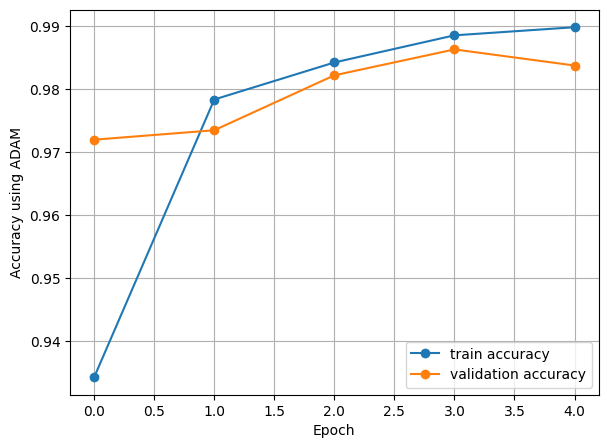

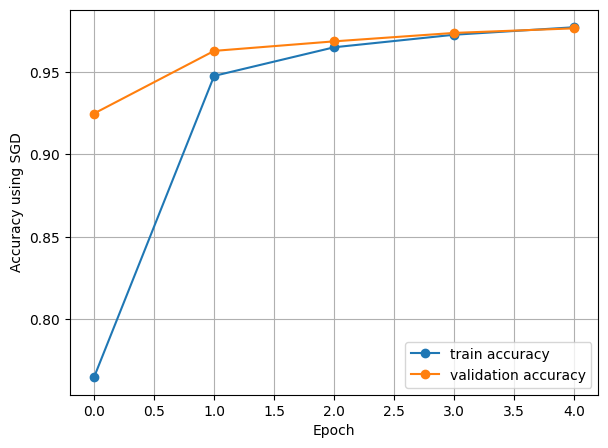

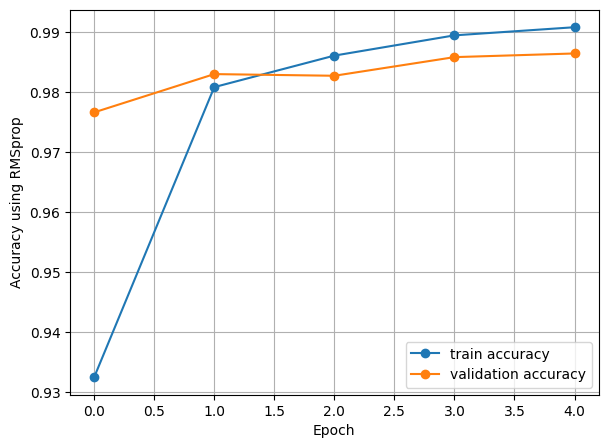

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy using ADAM')
plt.grid(True)
plt.legend(loc='lower right')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy using SGD')
plt.grid(True)
plt.legend(loc='lower right')

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h3.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h3.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy using RMSprop')
plt.grid(True)
plt.legend(loc='lower right')


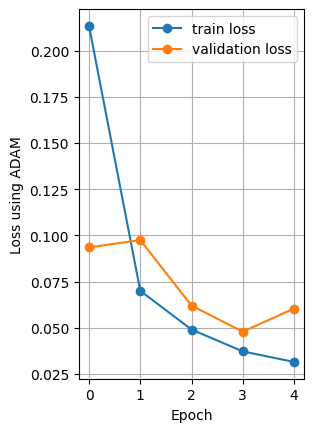

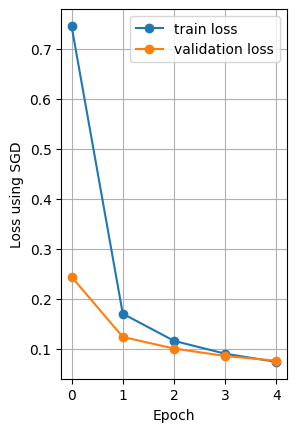

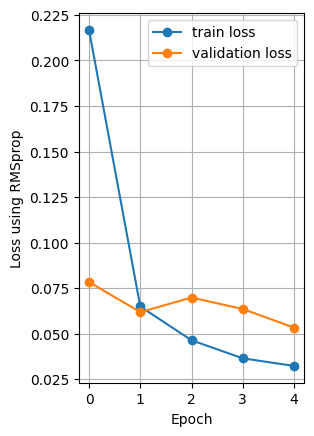

In [12]:
plt.subplot(1,2,2)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss using ADAM')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.subplot(1,2,2)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss using SGD')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

plt.subplot(1,2,2)
plt.plot(h3.history['loss'], 'o-', label='train loss')
plt.plot(h3.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss using RMSprop')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()